# Lezione 07

## Dario Pullia

### Esercizio 07.2

Spiegazioni varie

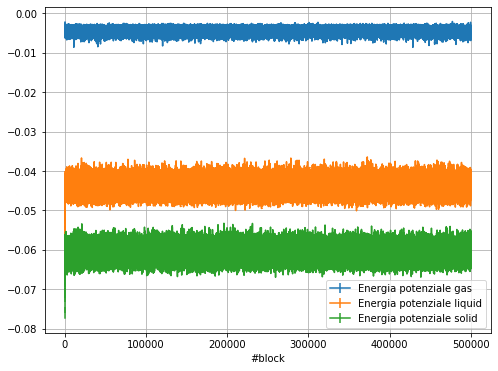

In [104]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np

npart=108


def DataBlocking(Epot, L):
    M=x[-1]
    N=int(M/L)
    E=0
    E2=0
    res=[]
    resErr=[]

    for i in range(N):
        Sum=0
        for j in range (L):
            Sum+=Epot[j+i*L]
        E=(Sum/L + E*i)/(i+1)
        E2=((Sum/L)**2 +E2*i)/(i+1)

    return error_prog(E, E2, N)


def error_prog( AV,  AV2,  n):
    if (n==0):
        return 0
    else:
        return math.sqrt((AV2-AV*AV)/n)


def AutoC(t, vec):
    appo1=0
    appo2=0
    appo3=0
    appo4=0
    appo5=0
    tmax=0
    tmax=vec.size
    for i in range(tmax-t):
        appo1+=vec[i]*vec[i+t]
        appo2+=vec[i]
        appo3+=vec[i+t]
    for i in range(tmax):
        appo4+=vec[i]*vec[i]
        appo5+=vec[i]
        
    return (appo1/(tmax-t) - appo2*appo3/((tmax-t)*(tmax-t)))/((appo4/tmax)-(appo5/tmax)**2)    






fig=plt.figure(figsize=(8, 6))

for s in ['gas','liquid','solid']:
    x, Epot, EpotAVG, EpotErr= np.loadtxt("data/"+s+"/output_epot.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')

    plt.errorbar(x,Epot/npart, yerr=EpotErr/npart, marker="", label="Energia potenziale "+s)



plt.xlabel('#block')
plt.ylabel('')
plt.grid(True)
plt.legend()
plt.show()

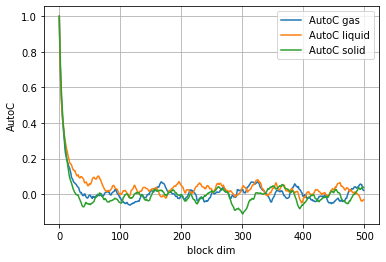

In [105]:

for s in ['gas','liquid','solid']:
    Epot = np.loadtxt("data/"+s+"/output_epot.dat", usecols=(1), delimiter=' ', unpack='true')

    ACor=[]

    for i in range(500):

        ACor.append(AutoC(i, Epot[:5000])) #Autocorrelare oltre i primi 5000 appesantisce inutilmente
        
    plt.plot(np.arange(500),ACor, label='AutoC '+s)

plt.xlabel('block dim')
plt.ylabel('AutoC')
plt.grid(True)
plt.legend()
plt.show()

Ora farò data blocking sui dati dei blocchi da una misura per blocco

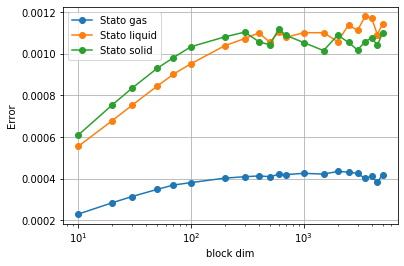

In [110]:
L=[10,20,30,50,70,100,200, 300,400,500, 600,700,1000,1500,2000,2500,3000,3500,4000,4500,5000]

for s in ['gas','liquid','solid']:
    Epot= np.loadtxt("data/"+s+"/output_epot.dat", usecols=(1), delimiter=' ', unpack='true')

    Errors=[]
    for i in L:
        Errors.append(DataBlocking(Epot, i))


    plt.plot(L,Errors, marker="o",label='Stato '+s)
    
    
plt.xlabel('block dim')
plt.ylabel('Error')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()    